# Intermediate Statistics Final Project

## Import Packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

# Scenario 1

In [2]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat,pval)

2.9229268377264077 0.0034675798365736213


#The test is significant as the pvalue is smaller than 0.05 meaning theres a significant difference in the amount of people that are not as disabled and those that are. 

# Scenario 2 

In [3]:
antiseptics = pd.read_csv("/Users/christinasimbenga/Desktop/antiseptics.csv")
antiseptics.head()

,Clinic,Antiseptic Type,Number of applications
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


## Data wrangling 

In [4]:
antiseptics.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)


In [5]:
antiseptics.head()

,Clinic,AS,Count
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


In [6]:
antiseptics_pivot = pd.pivot_table(antiseptics,index='AS',columns='Clinic',values="Count")
antiseptics_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [7]:
stats.chi2_contingency(antiseptics_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

#accept the null hypothesis as there is no difference with the location and the amount/type of antiseptics used. We also meet the assumptions for Chi-square as well. 

# Scenario 3 

In [8]:
savings = pd.read_csv("/Users/christinasimbenga/Desktop/savings.csv")

In [9]:
savings.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


## Data Wrangling 

In [10]:
savings_expanded=pd.melt(savings,var_name='Group', value_name='$')
savings_expanded.head()

,Group,$
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18


In [11]:
savings_expanded = savings_expanded.replace(savings.columns, [0,1,2,3])
savings_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='$', ylabel='Density'>

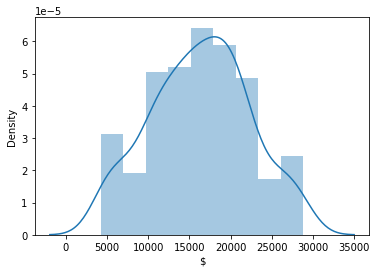

In [13]:
sns.distplot(savings_expanded["$"])

In [15]:
savings_expanded['$SQRT'] = np.sqrt(savings_expanded['$'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='$SQRT', ylabel='Density'>

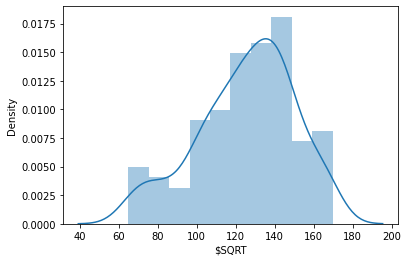

In [16]:
sns.distplot(savings_expanded['$SQRT'])

#Will just use the first as it is the most normal I just wanted to test out the square and see what would happen 

## assumption of homogenity 

In [17]:
scipy.stats.bartlett(savings_expanded['$'], savings_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

#We do not meet this assumptions. We would stop here or proceed with caution 

## Analysis

In [18]:
savings_expanded.dropna(inplace=True)

In [19]:
stats.f_oneway(savings_expanded['$'][savings_expanded['Group']==0],
              savings_expanded['$'][savings_expanded['Group']==1],
              savings_expanded['$'][savings_expanded['Group']==2],
              savings_expanded['$'][savings_expanded['Group']==3])

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

#Accepting the null hypothesis meaning there is no significant difference in the aounts and the amount of savings in the accounts. No difference in the saving practices of different demographic groups. 

# Scenario 4 

In [29]:
stat, pval = proportions_ztest([129,374],[171, 74])
print(stat,pval)

nan nan


In [30]:
count = np.array([129, 374])
nobs = np.array([74, 171])
stat, pval = proportions_ztest(count, nobs)
print(stat,pval)

nan nan


#I am not sure why this is not giving me any values.I have played around with it and still no values.